In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

In [3]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols,
                      encoding='latin-1')
users.head()

user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213

In [4]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

In [5]:
movie_ratings=pd.merge(movies,ratings)

In [6]:
lens=pd.merge(movie_ratings,users)
lens.head()

movie_id                  title release_date  video_release_date  \
0         1       Toy Story (1995)  01-Jan-1995                 NaN   
1         4      Get Shorty (1995)  01-Jan-1995                 NaN   
2         5         Copycat (1995)  01-Jan-1995                 NaN   
3         7  Twelve Monkeys (1995)  01-Jan-1995                 NaN   
4         8            Babe (1995)  01-Jan-1995                 NaN   

                                            imdb_url  user_id  rating  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...      308       4   
1  http://us.imdb.com/M/title-exact?Get%20Shorty%...      308       5   
2  http://us.imdb.com/M/title-exact?Copycat%20(1995)      308       4   
3  http://us.imdb.com/M/title-exact?Twelve%20Monk...      308       4   
4     http://us.imdb.com/M/title-exact?Babe%20(1995)      308       5   

   unix_timestamp  age sex occupation zip_code  
0       887736532   60   M    retired    95076  
1       887737890   60   M    retired    95076  
2       887739608   60   M    retired    95076  
3       887738847   60   M    retired    95076  
4       887736696   60   M    retired    95076

# What are the 25 most rated movies??

In [7]:
most_rated=lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
dtype: int64

# Which movies are most highly rated?

In [8]:
l=lens.groupby('title').agg({'rating': [np.size, np.mean]})
l.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [9]:
#movies that have been rated at least 100 times.
l1=l['rating']['size']>=100
l[l1].sort_values([('rating','mean')],ascending=False).head()

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230

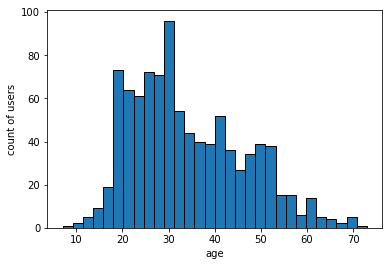

In [10]:
plt.hist(users.age,bins=30,edgecolor='k')
plt.ylabel('count of users')
plt.xlabel('age')
plt.show()

In [11]:
pivoted = lens.pivot_table(index=['movie_id','title'],
                           columns=['sex'],
                           values='rating')
pivoted.head()

sex                                F         M
movie_id title                                
1        Toy Story (1995)   3.789916  3.909910
2        GoldenEye (1995)   3.368421  3.178571
3        Four Rooms (1995)  2.687500  3.108108
4        Get Shorty (1995)  3.400000  3.591463
5        Copycat (1995)     3.772727  3.140625

In [12]:
pivoted['diff']=pivoted.F-pivoted.M
pivoted.head()

sex                                F         M      diff
movie_id title                                          
1        Toy Story (1995)   3.789916  3.909910 -0.119994
2        GoldenEye (1995)   3.368421  3.178571  0.189850
3        Four Rooms (1995)  2.687500  3.108108 -0.420608
4        Get Shorty (1995)  3.400000  3.591463 -0.191463
5        Copycat (1995)     3.772727  3.140625  0.632102

In [13]:
lens.head()

movie_id                  title release_date  video_release_date  \
0         1       Toy Story (1995)  01-Jan-1995                 NaN   
1         4      Get Shorty (1995)  01-Jan-1995                 NaN   
2         5         Copycat (1995)  01-Jan-1995                 NaN   
3         7  Twelve Monkeys (1995)  01-Jan-1995                 NaN   
4         8            Babe (1995)  01-Jan-1995                 NaN   

                                            imdb_url  user_id  rating  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...      308       4   
1  http://us.imdb.com/M/title-exact?Get%20Shorty%...      308       5   
2  http://us.imdb.com/M/title-exact?Copycat%20(1995)      308       4   
3  http://us.imdb.com/M/title-exact?Twelve%20Monk...      308       4   
4     http://us.imdb.com/M/title-exact?Babe%20(1995)      308       5   

   unix_timestamp  age sex occupation zip_code  
0       887736532   60   M    retired    95076  
1       887737890   60   M    retired    95076  
2       887739608   60   M    retired    95076  
3       887738847   60   M    retired    95076  
4       887736696   60   M    retired    95076

# Movies that was seen by people below 10 years 

In [129]:
l5=lens[lens['age']<10]
l6=l5.groupby('title')
l7=l6.size()
l7.head()

title
2001: A Space Odyssey (1968)    1
Abyss, The (1989)               1
Anaconda (1997)                 1
Anastasia (1997)                1
Apollo 13 (1995)                1
dtype: int64

# Movies that was rated by Female

In [141]:
w=lens.groupby(['title', 'sex'])['rating'].size()
w1=w.sort_values(ascending=True).unstack()['F']
w1.head()

title
'Til There Was You (1997)     5.0
1-900 (1994)                  1.0
101 Dalmatians (1996)        43.0
12 Angry Men (1957)          26.0
187 (1997)                   10.0
Name: F, dtype: float64